<a href="https://colab.research.google.com/github/durnav/Ml-lab-exp/blob/main/HWR_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
X,Y=load_digits().data,load_digits().target

In [ ]:
X


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
X.shape

(1797, 64)

In [ ]:
Y.shape

(1797,)

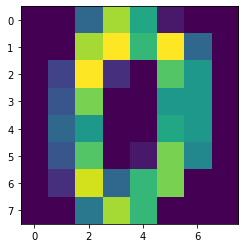

In [ ]:
plt.imshow(X[0].reshape(8,8))

In [ ]:
def softmax(a):
  e_a=np.exp(a)
  ans=e_a/np.sum(e_a,axis=1, keepdims=True)
  return ans

In [ ]:
softmax([[90,10],[70,30]])

array([[1.00000000e+00, 1.80485139e-35],
       [1.00000000e+00, 4.24835426e-18]])

In [ ]:
class NN:
  def __init__(self,input_size=64,layers=[500,1000],output=10):
    np.random.seed(0)
    model ={}
    model['w1']=np.random.randn(input_size,layers[0])
    model['b1']=np.zeros((1,layers[0]))

    model['w2']=np.random.randn(layers[0],layers[1])
    model['b2']=np.zeros((1,layers[1]))

    model['w3']=np.random.randn(layers[1],output)
    model['b3']=np.zeros((1,output))
    self.model=model
  
  def forward(self,X):
    z1 = np.dot(X,self.model['w1']) + self.model['b1']
    a1=np.tanh(z1)

    z2 = np.dot(a1,self.model['w2']) + self.model['b2']
    a2=np.tanh(z2)

    z3 = np.dot(a2,self.model['w3']) + self.model['b3']
    Y_=softmax(z3)

    self.activation_outputs=(a1,a2,Y_)
    return Y_

  def backward(self,X,Y,learning_rate=0.01):
    w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
    b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
    m=X.shape[0]
    a1,a2,Y_=self.activation_outputs

    delta3=Y_-Y
    dw3=np.dot(a2.T,delta3)
    db3=np.sum(delta3, axis=0)/float(m)

    delta2=(1-np.square((a2))*np.dot(delta3, w3.T))   
    dw2=np.dot(a1.T,delta2)
    db2=np.sum(delta2,axis=0)/float(m)

    delta1=(1-np.square((a1))*np.dot(delta2,w2.T))
    dw1=np.dot(X.T,delta1)
    db1=np.sum(delta1,axis=0)/float(m)

    self.model['w1'] -=learning_rate*dw1/m
    self.model['b1'] -=learning_rate*db1

    self.model['w2'] -=learning_rate*dw2/m
    self.model['b2'] -=learning_rate*db2

    self.model['w3'] -=learning_rate*dw3/m
    self.model['b3'] -=learning_rate*db3

  def predict(self,X):
    Y_out=self.forward(X)
    return np.argmax(Y_out,axis=1)

  



In [ ]:
def loss(Y_oht,Y_):
  l=-np.mean(Y_oht*np.log(Y_))
  return l

In [ ]:
def one_hot(Y,depth):
  m=Y.shape[0]
  Y_oht=np.zeros((m,depth))
  Y_oht[np.arange(m),Y]=1
  return Y_oht

In [ ]:
def train(X,Y,model,epochs,learning_rate=0.01,logs=True):
  training_loss=[]
  classes=10
  Y_oht=one_hot(Y,classes)
  for ix in range(epochs):
    Y_=model.forward(X)
    l=loss(Y_oht,Y_)
    model.backward(X,Y_oht,learning_rate)
    training_loss.append(l)
    if(logs):
      print("epochs %d Loss %.4f" %(ix,l))
  return training_loss

In [ ]:
model = NN()

In [ ]:
loss=train(X,Y,model,700)

epochs 0 Loss 4.6186
epochs 1 Loss 4.8653
epochs 2 Loss 4.1271
epochs 3 Loss 3.9874
epochs 4 Loss 2.8601
epochs 5 Loss 2.9716
epochs 6 Loss 3.1685
epochs 7 Loss 3.0183
epochs 8 Loss 2.0481
epochs 9 Loss 2.4723
epochs 10 Loss 3.4921
epochs 11 Loss 5.1966
epochs 12 Loss 5.1050
epochs 13 Loss 5.4818
epochs 14 Loss 6.6960
epochs 15 Loss 7.5437
epochs 16 Loss 4.2130
epochs 17 Loss 8.6878
epochs 18 Loss 11.6708
epochs 19 Loss 6.1238
epochs 20 Loss 3.4990
epochs 21 Loss 2.1721
epochs 22 Loss 4.0179
epochs 23 Loss 7.0235
epochs 24 Loss 8.7207
epochs 25 Loss 8.4431
epochs 26 Loss 5.6812
epochs 27 Loss 8.7287
epochs 28 Loss 15.0967
epochs 29 Loss 17.1045
epochs 30 Loss 15.8082
epochs 31 Loss 8.6341
epochs 32 Loss 8.5329
epochs 33 Loss 4.5787
epochs 34 Loss 11.9232
epochs 35 Loss 15.3653
epochs 36 Loss 18.4135
epochs 37 Loss 13.4955
epochs 38 Loss 8.7515
epochs 39 Loss 6.7375
epochs 40 Loss 8.8414
epochs 41 Loss 11.3392
epochs 42 Loss 6.5245
epochs 43 Loss 9.4916
epochs 44 Loss 13.1106
epochs 45 

In [ ]:
Ypred=model.predict(X)


In [ ]:
np.mean(Ypred == Y)

In [ ]:
plt.imshow(X[20].reshape(8,8))

In [ ]:
Ypred[20]

In [ ]:
Y[20]